In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('weight-height.csv')

In [10]:
df.sample(5), df.shape

(      Gender     Height      Weight
 8788  Female  64.728390  147.519907
 6950  Female  64.014586  136.703387
 526     Male  69.664752  176.259274
 3886    Male  69.231469  173.829606
 1376    Male  65.102052  156.658460,
 (10000, 3))

In [12]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

C:\Users\vasis\AppData\Local\Temp\ipykernel_10892\3945773010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

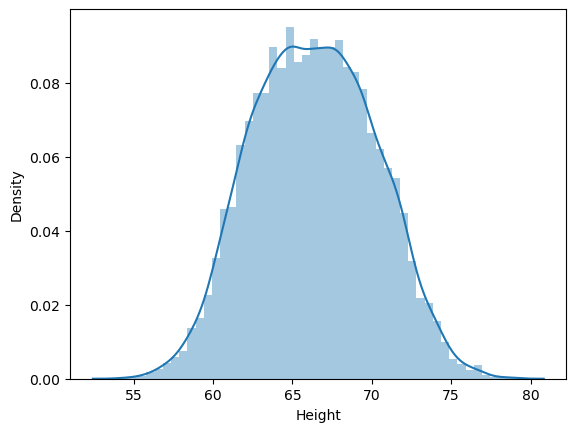

In [30]:
sns.distplot(df['Height'])

<Axes: ylabel='Height'>

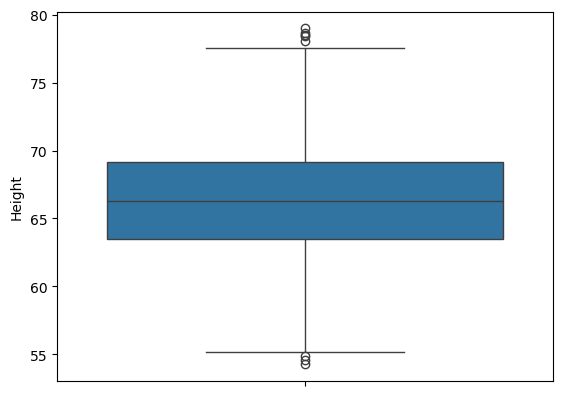

In [32]:
sns.boxplot(df['Height'])

In [34]:
upper_limit = df['Height'].quantile(0.99)
lower_limit = df['Height'].quantile(0.01)

upper_limit, lower_limit

(74.7857900583366, 58.13441158671655)

In [38]:
df[(df['Height'] >=  upper_limit) | (df['Height'] <= lower_limit)].head()

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403


In [44]:
new_df = df[(df['Height'] < upper_limit) & (df['Height'] > lower_limit)]

In [46]:
new_df.sample(4)

,Gender,Height,Weight
6997,Female,63.787050,120.838528
385,Male,67.652528,188.200679
4198,Male,70.681044,195.985898
5697,Female,66.204830,137.164879


C:\Users\vasis\AppData\Local\Temp\ipykernel_10892\1622920233.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

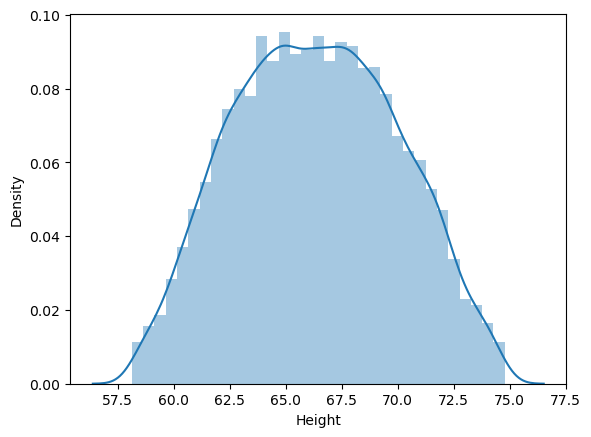

In [48]:
sns.distplot(new_df['Height'])

<Axes: ylabel='Height'>

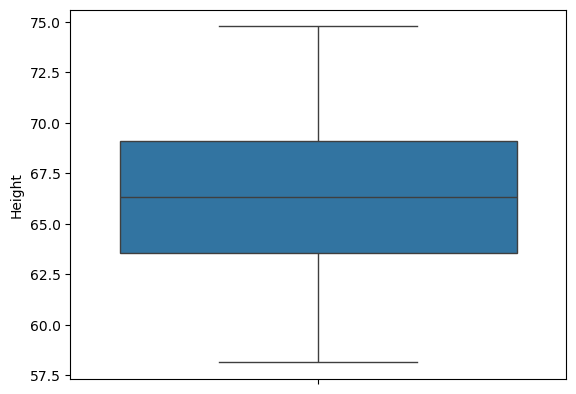

In [52]:
sns.boxplot(new_df['Height'])

# Winsorization

In [67]:
df['Height'] = np.where(
    df['Height'] >= upper_limit,
    upper_limit,
    np.where(
        df['Height'] <= lower_limit,
        lower_limit,
        df['Height']
    )
)

In [69]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

C:\Users\vasis\AppData\Local\Temp\ipykernel_10892\301750122.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

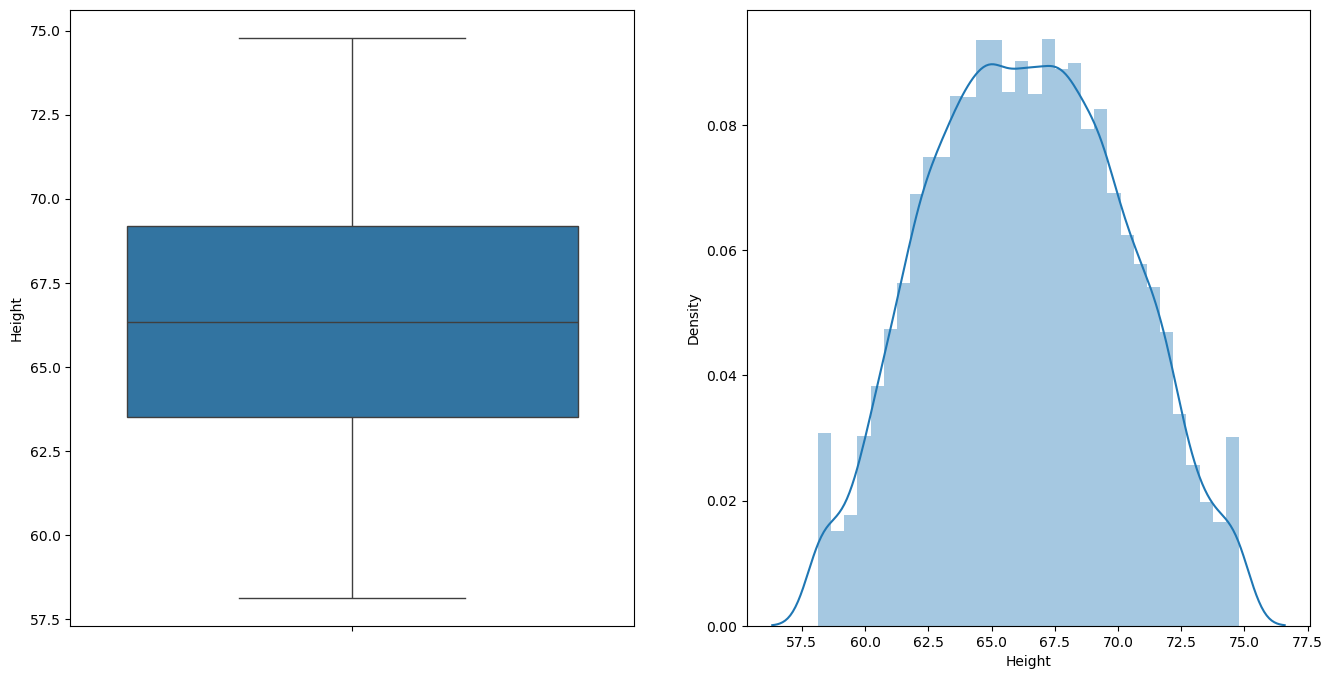

In [87]:
plt.figure(figsize=(16, 8))

plt.subplot(1,2,1)
sns.boxplot(df['Height'])

plt.subplot(1,2,2)
sns.distplot(df['Height'])